In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:",r"C:\Users\Asus\OneDrive\Desktop\email_spam")

c:\Users\Asus\OneDrive\Desktop\email_spam\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Asus\OneDrive\Desktop\email_spam


In [2]:
import os
import pandas as pd
import numpy as np
df = pd.read_csv(os.path.join(path, "spam.csv"), encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.columns = ['label', 'message']

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [9]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [10]:
import nltk
nltk.download('punkt_tab')  

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
df['no_chars']=df['message'].apply(len)

In [12]:
#no of words
df['no_words']= df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [13]:
#no of words
df['no_sentences']= df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [14]:
from nltk.corpus import stopwords
import string

In [15]:
def transform_text(text):
    # lower case
    text = text.lower()
    
    #tokenize
    text = nltk.word_tokenize(text)
    
    # remove special characters and numbers
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
      
    #list cloning      
    text = y[:]
    y.clear()
    
    # remove stop words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # stemming
    for i in text:
            y.append(ps.stem(i))
    
    return " ".join(y)

In [16]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()   
ps.stem("dancing")

'danc'

In [17]:
df['transform_text'] = df['message'].apply(transform_text)

In [18]:
df.head()

,label,message,no_chars,no_words,no_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [19]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,background_color='white')

In [20]:
spam_wc = wc.generate(df[df['label'] == 1]['transform_text'].str.cat(sep=" "))


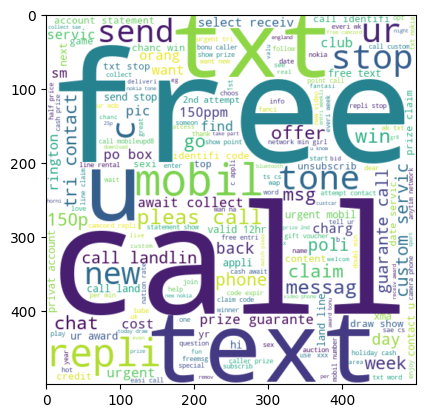

In [21]:
import matplotlib.pyplot as plt  
plt.imshow(spam_wc, interpolation='bilinear')

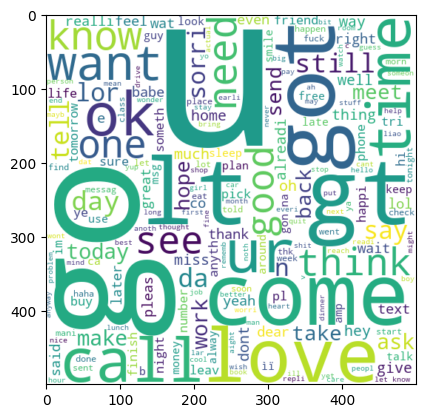

In [22]:
ham_wc = wc.generate(df[df['label'] == 0]['transform_text'].str.cat(sep=" "))
plt.imshow(ham_wc, interpolation='bilinear')

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transform_text']).toarray()

In [40]:
y = df['label'].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)   

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
mnb = MultinomialNB()

In [43]:
mnb.fit(X_train, y_train)  

MultinomialNB()

In [45]:
y_pred_mnb = mnb.predict(X_test)   

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
print("MultinomialNB Accuracy: ", accuracy_score(y_test, y_pred_mnb))  

MultinomialNB Accuracy:  0.9709864603481625


In [48]:
print("Precision",precision_score(y_test,y_pred_mnb))

Precision 1.0


In [49]:
print("MultinomialNB Confusion Matrix: \n", confusion_matrix(y_test, y_pred_mnb))

MultinomialNB Confusion Matrix: 
 [[896   0]
 [ 30 108]]


In [50]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))